In [1]:
import pandas as pd
import fastai.text as ftxt
import sklearn.model_selection as skms
import numpy as np
import spacy as sp
import pickle
import os

In [2]:
path = os.getcwd()
path

'/media/rinnely/Archer/ENES/Stance/Neural-Network-Model/ABORTOLA'

In [3]:
path = os.getcwd()
topic = 'aborto'
os.makedirs(path+'/NN/'+ topic, exist_ok=True)
path_nn_model= path+'/NN/'+topic
path_nn_model

'/media/rinnely/Archer/ENES/Stance/Neural-Network-Model/ABORTOLA/NN/aborto'

In [4]:
tweets = pd.read_csv(path+'/')

In [5]:
test = tweets[['Stance', 'Tweet']][:933]

In [6]:
test.tail()

,Stance,Tweet
928,0,USER USER I followed him before I watched huma...
929,-1,"For he who avenges blood remembers, he does no..."
930,-1,Life is sacred on all levels. Abortion does no...
931,-1,"USER U refer to ""WE"" which =""YOU"" & a minority..."
932,-1,Al Robertson's mom #DuckDynasty chose life as ...


In [7]:
train = tweets[['Stance', 'Tweet']][933:]

In [8]:
train.head(), train.shape

(     Stance                                              Tweet
 933      -1      Celebrating the life. Not mourning the death.
 934      -1  mt USER: women are not ragdolls. they can prac...
 935      -1  check out some #prolife news in #2017 from #th...
 936      -1  what being a mother has taught me about abortion:
 937      -1  gop to #defundplannedparenthood in #obamacare ..., (3089, 2))

In [9]:
train.shape, test.shape

((3089, 2), (933, 2))

In [10]:
# train.to_csv(path_nn_model+'/train_tweetsAuto.csv', index=False)
# test.to_csv(path_nn_model+'/test_tweetsManual.csv', index=False)

In [4]:
train = pd.read_csv(path+'/clean_train_aborto.csv')
test = pd.read_csv(path+'/clean_test_aborto500.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Stance    2000 non-null int64
Tweet     2000 non-null object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 2 columns):
Stance    329 non-null int64
Tweet     329 non-null object
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [7]:
data_lm = ftxt.TextLMDataBunch.from_df(path_nn_model, train, test, bs=32)
data_clas = ftxt.TextClasDataBunch.from_df(path_nn_model, train, test, vocab=data_lm.train_ds.vocab, bs=32)

In [8]:
data_lm.show_batch()

idx,text
0,"esas mujeres , de ese movimiento que lucha xxunk contra el patriarcado y la imposición de una sociedad machista . te admiro , te banco y te sigo , porque juntxs xxunk mas fuerte y xxup url … xxbos hoy también es el día del amor propio . . . # xxunk a o xxup url xxbos "" será ley "" , el texto de xxup user en favor de"
1,"el 10 % se hacen en instituciones sanitarias con garantías de calidad . xxup url xxbos gracias por tu compromiso xxup user es hermoso que podamos xxunk de esta manera . es un abrazo para todas niña mamá tendrá un estreno federal durante la primera semana de marzo xxup url xxup url … xxbos # abortolegal | # goldenglobes embarazada , # michellewilliams xxunk el derecho de la mujer de"
2,"han xxunk xxunk con el feminismo , también se xxunk a legislar por todas las mujeres de méxico . empezando con el xxup url xxbos acompañando a las hijas de la esi ya xxup url … xxbos despenalizar el aborto en # puebla podría ser realidad como avanza el argumento por despenalizarlo en todo # mexico . pero ojo , el xxunk tiene que ser hacia xxunk y xxunk como"
3,"xxunk que somos muchos ! y es necesario que lo sepan . xxup url xxbos # lomejordel2019 # abortolegal # colombia el instituto guttmacher calcula que , de los abortos que se realizan en colombia cada año , solo entre el 8 y 10 % se hacen en instituciones sanitarias con garantías de calidad . xxup url xxbos # abortolegal xxup user confirmó que enviará un proyecto de ley para"
4,xxbos hoy xxunk 108 años # florentina . acá seguimos tu lucha ! ! ! ... # abortolegal xxup user xxup user xxup user xxbos # abortolegal es salud pública y justicia social . este 19 de febrero el proyecto está en las calles junto al espacio de ddhh de xxup user nos encontramos a las 17 hs en xxunk xxunk y rivadavia . xxup url … xxup user xxup


In [9]:
data_clas.show_batch()

text,target
"xxbos con el # abortolegal la maternidad pasa a ser xxunk una xxunk que impide el desarrollo de la mujer . se xxunk el "" derecho a decidir "" o , lo que es lo mismo , el derecho de la mujer a decidir sobre la vida de su hijo , que no es otra cosa que el "" derecho "" a matar a su hijo .",0
"xxbos lo q se xxunk es q le ponga el culo en la xxunk al pibe ! ! xxunk sra # seraley como xxunk si en vez de una mujer grande , sea un hombre el q xxunk en xxunk y le xxunk el culo en la cara xxunk hija . las xxunk del xxunk son así . todos pueden xxunk . xxunk si le xxunk",0
"xxbos hija de 5 años ... jugando con 3 xxunk , dos xxunk y una negra . con la negra en mano y xxunk en alto xxunk : - xxunk xxunk ! rindanse ... viva la reina xxunk ( sic ) ! ! ! estas pibas van a xxunk la historia como se le xxunk los xxunk . rindanse ! ha dicho ! xxup url",0
"xxbos no te xxunk los xxunk , como dice xxup user ... no todo se trata de vos , ¿ sabías ? claramente xxunk de "" mujeres que se dicen progres que defienden los abortos clandestinos "" ... no dije "" xxunk "" tal o cual . lo que buscan las demás no lo sé , yo se lo que yo xxunk .",0
"xxbos q va a saber de eso si solo le gusta la xxunk , no sabe lo q es el xxunk de poder dar vida , # noalaborto # sialavida si las mujeres no quieren tener hijos xxunk las xxunk y ya por q matar a un ser indefenso , yo sigo estando de acuerdo con las tres causales para un aborto",1


In [10]:
data_lm.save(path_nn_model+'/data_lm.pkl')
data_clas.save(path_nn_model+'/data_clas.pkl')

In [11]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '#'],
 3024)

In [13]:
pretrained_path = '/home/rinnely/ENES/Stance/Neural-Network-Model/spanish-model/'
pretrained_path

'/home/rinnely/ENES/Stance/Neural-Network-Model/spanish-model/'

In [14]:
pretrained_model = (pretrained_path+'lm-spanish-weights-2', pretrained_path+'spanish-itos-pickle')

In [15]:
learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, pretrained_fnames=pretrained_model, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-01
Min loss divided by 10: 1.91E-01


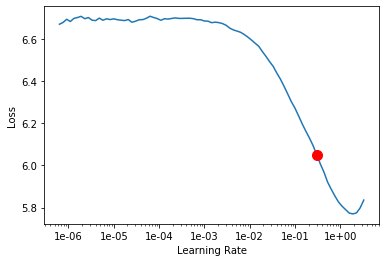

In [17]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [18]:
learn.fit_one_cycle(3,1.9e-01)

epoch,train_loss,valid_loss,accuracy,time
0,5.220511,4.301552,0.204286,00:05
1,4.304091,4.146197,0.221429,00:05
2,3.666922,4.062085,0.235000,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.31E-03


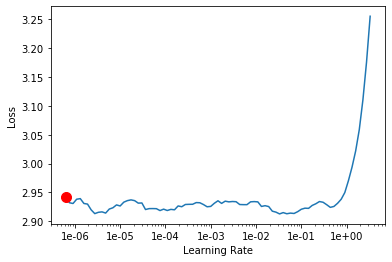

In [19]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.935575,4.048994,0.232232,00:05
1,2.925661,4.042470,0.230982,00:05
2,2.898958,4.040166,0.231339,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.37E-02


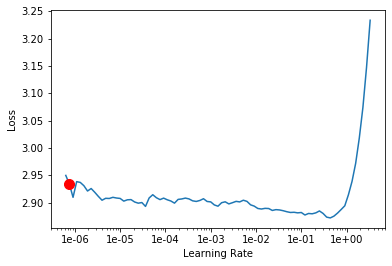

In [22]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [23]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.865896,4.036115,0.232589,00:05
1,2.871451,4.029119,0.233393,00:05
2,2.853076,4.026136,0.233036,00:05
3,2.835114,4.028568,0.233393,00:05
4,2.818028,4.025325,0.234643,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.75E-07


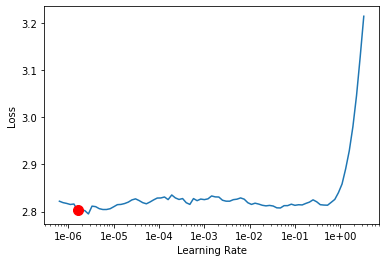

In [24]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.818230,4.024753,0.235268,00:05
1,2.803128,4.021250,0.234911,00:05
2,2.796804,4.019988,0.235446,00:05
3,2.781460,4.022145,0.234375,00:05
4,2.773752,4.022561,0.234464,00:05


In [26]:
learn.save_encoder(path_nn_model+'/ml_encoder')

In [27]:
learn.save('la-model')

In [28]:
learn = ftxt.text_classifier_learner(data_clas, ftxt.AWD_LSTM, drop_mult=0.6)

In [29]:
learn.load_encoder(path_nn_model+'/ml_encoder')
learn.metrics=[ftxt.accuracy, ftxt.FBeta(average='micro')]

In [30]:
learn.save('learner-1stage')

In [31]:
learn.load('learner-1stage');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 2.09E-02


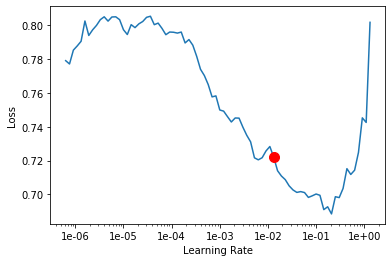

In [32]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [33]:
learn.fit_one_cycle(10,2e-02,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.626529,0.696722,0.613982,0.613982,00:07
1,0.583253,0.606434,0.647416,0.647416,00:06
2,0.588239,0.625423,0.595745,0.595745,00:06
3,0.562250,0.569321,0.708207,0.708207,00:06
4,0.553231,0.616630,0.668693,0.668693,00:07
5,0.519918,0.650922,0.626140,0.626140,00:07
6,0.519908,0.625130,0.653495,0.653495,00:06
7,0.498175,0.661038,0.613982,0.613982,00:06
8,0.496207,0.663210,0.644377,0.644377,00:07
9,0.467878,0.659557,0.647416,0.647416,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.10E-05


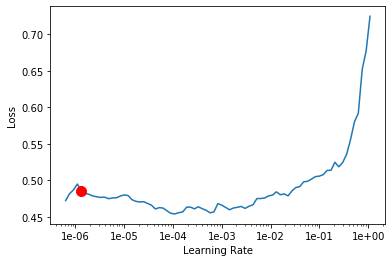

In [34]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [35]:
learn.fit_one_cycle(5,1.10e-05, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.469338,0.672925,0.641337,0.641337,00:07
1,0.462204,0.657146,0.650456,0.650456,00:07
2,0.461298,0.654745,0.653495,0.653495,00:06
3,0.466291,0.666619,0.647416,0.647416,00:07
4,0.476013,0.661097,0.635258,0.635258,00:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


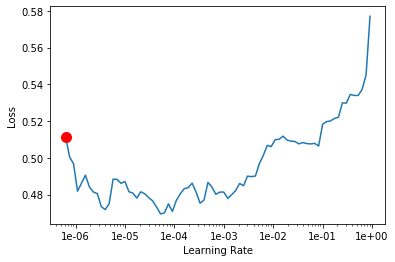

In [36]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(5,5.25e-06,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.465699,0.657360,0.644377,0.644377,00:07
1,0.458661,0.631684,0.656535,0.656535,00:07
2,0.451057,0.673364,0.632219,0.632219,00:07
3,0.460052,0.659685,0.650456,0.650456,00:07
4,0.451986,0.711510,0.607903,0.607903,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.32E-05


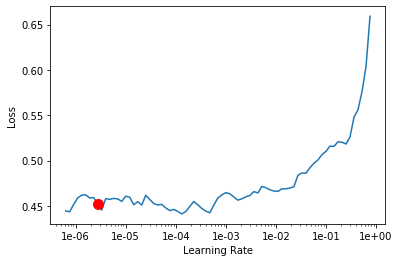

In [38]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [39]:
learn.fit_one_cycle(5,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.449410,0.510857,0.759878,0.759878,00:08
1,0.420838,0.491746,0.747720,0.747720,00:08
2,0.351791,0.474984,0.772036,0.772036,00:08
3,0.295399,0.488874,0.772036,0.772036,00:07
4,0.255328,0.483521,0.781155,0.781155,00:07


In [40]:
learn.save('learner_78fbeta')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 6.31E-08


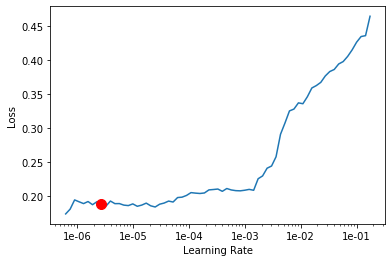

In [41]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [42]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.224005,0.494068,0.768997,0.768997,00:08
1,0.226066,0.537959,0.744681,0.744681,00:08
2,0.228013,0.524167,0.793313,0.793313,00:08
3,0.189204,0.568875,0.772036,0.772036,00:07
4,0.177032,0.548116,0.808511,0.808511,00:08
5,0.147673,0.540568,0.814590,0.814590,00:08
6,0.119437,0.507711,0.835866,0.835866,00:08
7,0.091516,0.584920,0.817629,0.817629,00:08
8,0.082330,0.574357,0.811550,0.811550,00:07
9,0.075658,0.567279,0.811550,0.811550,00:07


In [43]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ftxt.TextClassificationInterpretation(learn, preds, y, losses)

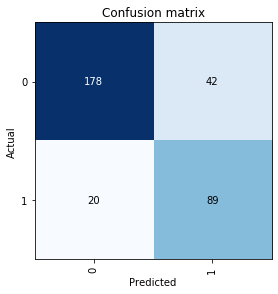

In [44]:
interp.plot_confusion_matrix()

In [45]:
learn.save('learner_81fbeta')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


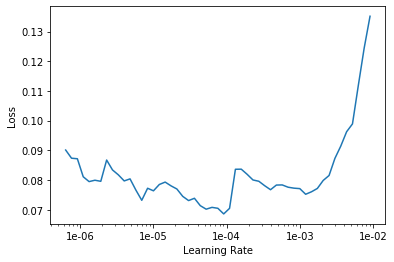

In [46]:
learn.lr_find(); learn.recorder.plot()

In [47]:
learn.fit_one_cycle(10,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.064092,0.561553,0.820669,0.820669,00:07
1,0.083129,0.556815,0.829787,0.829787,00:08
2,0.102614,0.644516,0.784195,0.784194,00:08
3,0.117465,0.520893,0.823708,0.823708,00:08
4,0.101334,0.531396,0.826748,0.826748,00:07
5,0.096853,0.547571,0.829787,0.829787,00:07
6,0.076192,0.550418,0.826748,0.826748,00:07
7,0.050157,0.539659,0.829787,0.829787,00:08
8,0.038699,0.614954,0.820669,0.820669,00:07
9,0.047662,0.582412,0.832827,0.832827,00:08


In [48]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ftxt.TextClassificationInterpretation(learn, preds, y, losses)

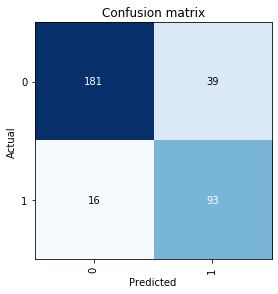

In [49]:
interp.plot_confusion_matrix()

In [51]:
learn.show_results()

text,target,prediction
"xxbos xxup user hola ! han muerto dos xxunk xxunk , dos chicas por un aborto inseguro e xxunk , desde k tu xxunk a tus xxunk votar en contra del # abortolegal legal . espero k no se te haya olvidado xxunk por sus almas , xxunk lo k es sus cuerpos están ya bajo tierra , gracias a ti .",0,0
"xxbos q las mujeres xxunk o no , no depende de tu opinión , ni de tu religión , ni de nada xxunk a vos . las mujeres q quieren abortar , abortan . la pregunta es si estás de acuerdo con q las mujeres pobres mueran y las xxunk no , cualquier otra discusión es xxunk . xxup url",0,1
"xxbos que nadie se deje llevar por la cultura de la xxunk . ¡ xxunk , chicas ! ¡ ustedes han xxunk alto el xxunk y la xxunk de las mujeres argentinas ! ¡ nadie podrá xxunk a la oleada de la nueva xxunk ! ¡ # seráley ! ¡ habrá ley contra viento y marea ! xxup url",0,0
"xxbos xxunk a casa xxunk y pienso cuantas xxunk como yo a sus xxunk xxunk y todavía tienen trabajo , en casa , xxunk . cada jornada en el congreso por el # abortolegalya me llena de xxunk porque nada de lo que pasa xxunk sería posible sin lo qué pasa xxunk . la fuerza es nuestra xxup url",0,0
"xxbos por esto mis amigas argentinas están en las calles , por que no puede ser . humanidad por favor ! ¿ de verdad le quieres xxunk la xxunk de seguir siendo niña ( dentro de lo posible ) a una niña de 10 años violada por el xxunk ? # basta # abortolegal xxup user xxup url",0,0
